In [58]:
#Step 1---------------------------------------------------------------------------------------------------------------------
#Load the CSV file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\KIIT\Downloads\Learning Python\COVID-19 Data Analysis and Visualization (Project)\CSV Files\owid-covid-data.csv")
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [60]:
#Step 2 and Step 3----------------------------------------------------------------------------------------------------------
#Filter only for India
#reduces the DataFrame to only 7 columns
#onvert the date column to a real date format
#Sort the data by date
#Preview how much the data got reduced

india_df = df[df['location'] == 'India']
india_df = india_df[['date', 'new_cases', 'total_cases', 'new_deaths', 'total_deaths', 'people_vaccinated', 'people_fully_vaccinated']]
india_df['date'] = pd.to_datetime(india_df['date'])
india_df = india_df.sort_values(by='date')
print("After filter we conclude that :")
print('Original Dataset Shape: ', df.shape)
print('Filtered India Dataset Shape: ', india_df.shape)

After filter we conclude that :
Original Dataset Shape:  (429435, 67)
Filtered India Dataset Shape:  (1682, 7)


In [ ]:
'''
“To make the dataset suitable for focused analysis, I filtered the data for India 
and selected only key columns such as date, new cases, new deaths, total cases, etc.
This reduced the dataset from 429,435 rows and 67 columns to just 1,682 rows and 7 columns. 
It significantly improved clarity and performance for visualization and interpretation.”
'''

In [64]:
#Step 4---------------------------------------------------------------------------------------------------------------------
print("Missing Values Before Removing: ")
india_df.isnull().sum()

Missing Values Before Removing: 


date                         0
new_cases                    8
total_cases                  8
new_deaths                   8
total_deaths                 8
people_vaccinated          437
people_fully_vaccinated    473
dtype: int64

In [66]:
#print("Missing Values After Removing: ")
india_df.dropna(inplace = True)
india_df.isnull().sum()

date                       0
new_cases                  0
total_cases                0
new_deaths                 0
total_deaths               0
people_vaccinated          0
people_fully_vaccinated    0
dtype: int64

In [68]:
#Step 5---------------------------------------------------------------------------------------------------------------------
#A quick summary of the data.
print(india_df.describe())

                                date     new_cases   total_cases  \
count                           1197  1.197000e+03  1.197000e+03   
mean   2022-10-26 09:33:50.075187968  2.792204e+04  3.975121e+07   
min              2021-02-13 00:00:00  0.000000e+00  1.082636e+07   
25%              2021-12-20 00:00:00  0.000000e+00  3.474028e+07   
50%              2022-10-25 00:00:00  0.000000e+00  4.464274e+07   
75%              2023-08-26 00:00:00  0.000000e+00  4.499660e+07   
max              2024-08-04 00:00:00  2.738957e+06  4.504175e+07   
std                              NaN  1.987155e+05  8.910654e+06   

         new_deaths   total_deaths  people_vaccinated  people_fully_vaccinated  
count   1197.000000    1197.000000       1.197000e+03             1.197000e+03  
mean     307.619048  482552.635756       8.548731e+08             7.249322e+08  
min        0.000000  154996.000000       8.044786e+06             7.668000e+03  
25%        0.000000  477422.000000       8.292199e+08          

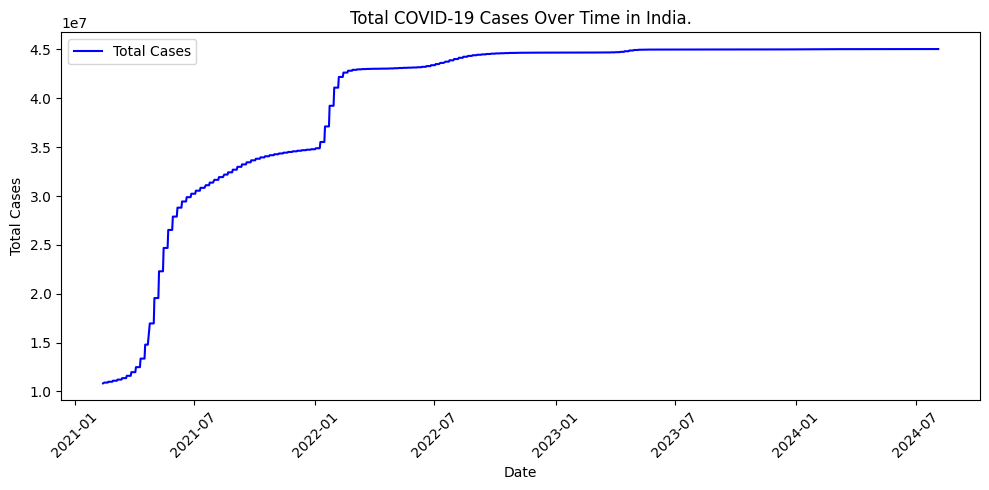

In [88]:
#Step 6---------------------------------------------------------------------------------------------------------------------
#Plot Total Cases Over Time (Line Plot)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(india_df['date'], india_df['total_cases'], label = 'Total Cases', color = 'blue')
plt.title('Total COVID-19 Cases Over Time in India.')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
"""
Q)Why use it figure?

It helps:
- Make your plots bigger (e.g., for presentations)
-Fit more data or labels without crowding
-Customize the appearance to your needs

Q)What is label='Total Cases':

This sets the label that will appear in the legend. When you use plt.legend(), it uses this label to show which line represents what.

Q)What is plt.xticks(rotation=45)?

This rotates the x-axis tick labels (in our case, the dates) by 45 degrees so that:
-The dates don’t overlap.
-It becomes easier to read long or dense date values

Q) What is plt.tight_layout()

This adjusts the spacing automatically between plot elements (like labels, title, and axis). 
It prevents overlapping or cut-off labels. It’s a common practice after adding titles and rotated text.
"""

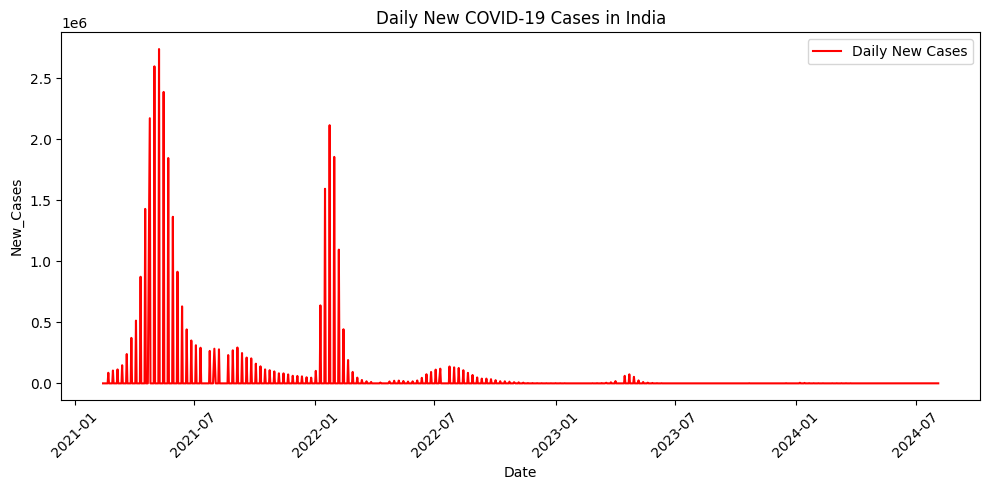

In [92]:
#Step 7---------------------------------------------------------------------------------------------------------------------
#Daily New Cases Over Time (Line Plot)
import matplotlib.pyplot as plt
india_df['daily_new_cases'] = india_df['new_cases'].fillna(0)
plt.figure(figsize = (10,5))
plt.plot(india_df['date'], india_df['new_cases'], label='Daily New Cases', color='red')
plt.title('Daily New COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('New_Cases')
plt.xticks(rotation= 45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
"""

Q) india_df['total_cases']

This is cumulative data.
Graph Shape: Always increasing or flat
Meaning: Shows how many total people got COVID-19 over time in India.
Graph: Smooth curve moving upward.

Q) india_df['new_cases']

This is daily change data.
Graph Shape: Goes up and down (spikes!)
Meaning: Shows how many new people got infected each day.
Graph: Fluctuating like a wave — helps detect surge periods.

"""

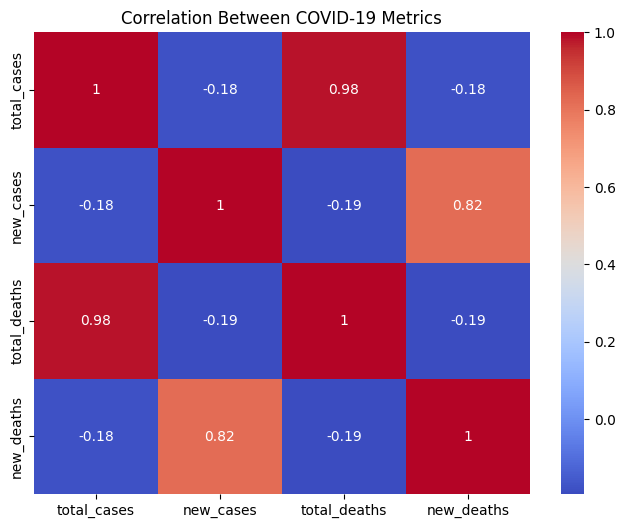

In [84]:
#Step 8---------------------------------------------------------------------------------------------------------------------
#Correlation Heatmap
import seaborn as sns
plt.figure(figsize = (8,6))
sns.heatmap(india_df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths']].corr(), annot =True, cmap= 'coolwarm')
plt.title('Correlation Between COVID-19 Metrics')
plt.show()

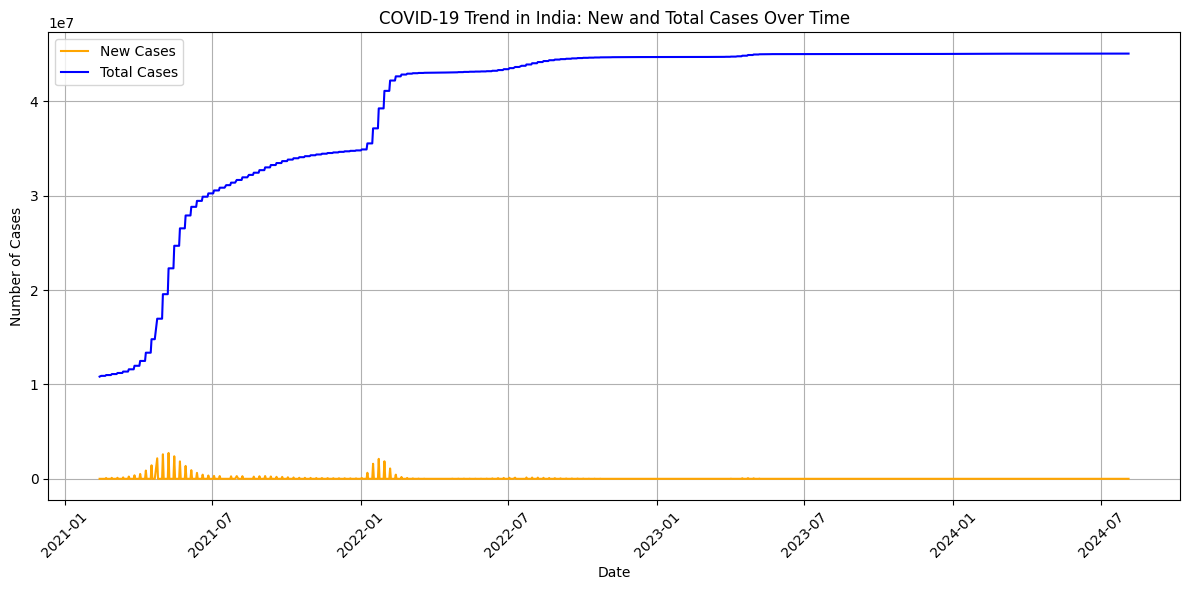

In [108]:
#Step 9---------------------------------------------------------------------------------------------------------------------
#New and Total Cases Over Time
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(india_df['date'], india_df['new_cases'], label='New Cases', color='orange')
plt.plot(india_df['date'], india_df['total_cases'], label='Total Cases', color='blue')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Trend in India: New and Total Cases Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

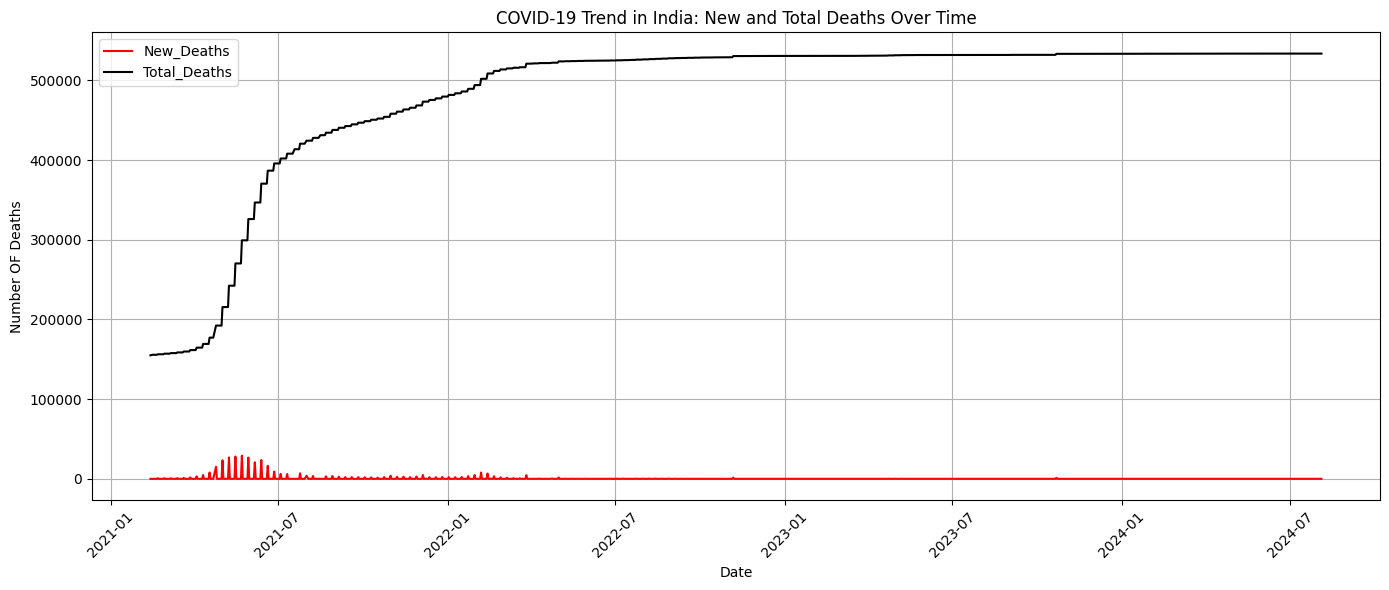

In [110]:
#Step 10---------------------------------------------------------------------------------------------------------------------
#New and Total Deaths Over Time
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))
plt.plot(india_df['date'], india_df['new_deaths'], label = 'New_Deaths', color = 'red')
plt.plot(india_df['date'], india_df['total_deaths'], label = 'Total_Deaths', color = 'black')
plt.title('COVID-19 Trend in India: New and Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number OF Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
'''
👇 practicing in this step:

- Handling multiple data lines in one chart.
- Reading and comparing trends.
- Using your skills in pandas, matplotlib.
'''

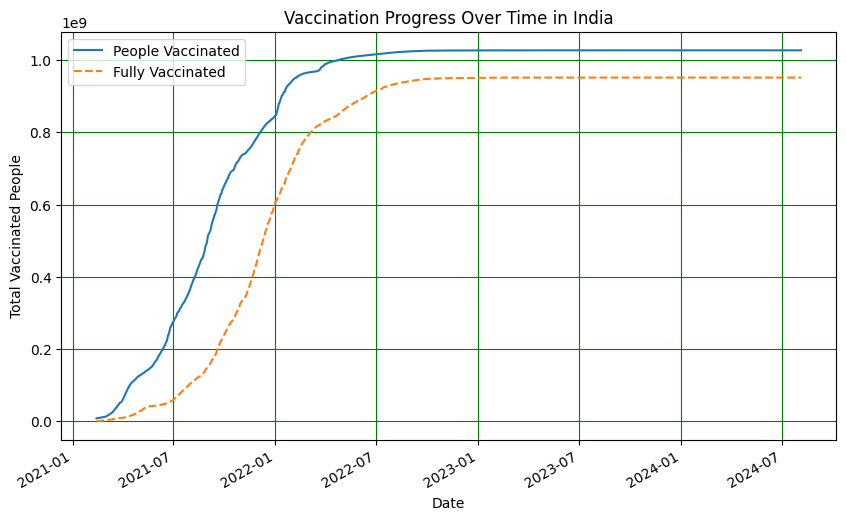

In [114]:
#Step 11---------------------------------------------------------------------------------------------------------------------
# Plotting the total number of people vaccinated over time using india_df
plt.figure(figsize = (10,6))

india_df.groupby('date')['people_vaccinated'].max().plot(label='People Vaccinated')
india_df.groupby('date')['people_fully_vaccinated'].max().plot(label='Fully Vaccinated', linestyle='--')

plt.title('Vaccination Progress Over Time in India')
plt.xlabel('Date')
plt.ylabel('Total Vaccinated People')
plt.legend()
plt.grid(True, color = 'Green')
plt.show()


In [ ]:
"""

Summary 👇
- groupby('date') groups all rows having the same date.
- .max() gives you the latest national cumulative value if the data has multiple rows per date.
- If your dataset has only one row per date, then groupby + max() won't change anything — but it still works without error.


"""

In [116]:
#Step 12---------------------------------------------------------------------------------------------------------------------
#india's Population something around 2020-21
population = 1380004385

# Get the most recent total values
total_vaccinated = india_df['people_vaccinated'].max()
fully_vaccinated = india_df['people_fully_vaccinated'].max()

# Calculate percentages
vaccinated_percentage = (total_vaccinated/population) * 100
fully_vaccinated_percentage = (fully_vaccinated/population) * 100

print(f"Percentage of population vaccinated: {vaccinated_percentage:.2f}%")
print(f"Percentage of population fully vaccinated: {fully_vaccinated_percentage:.2f}%")

Percentage of population vaccinated: 74.45%
Percentage of population fully vaccinated: 68.98%


In [ ]:
## 🧾 Step 14: Conclusion and Key Insights

### 📊 Summary of Findings

1. **Total Cases Trend**  
   India experienced a steady rise in total COVID-19 cases, with noticeable spikes during major waves, 
   reflecting the impact of variants and public health measures.

2. **Daily New Cases**  
   Daily new cases showed periodic surges, highlighting peaks of infection and the effectiveness of subsequent containment measures.

3. **Recovery and Death Trends**  
   Total deaths rose steadily alongside cases. Daily deaths closely followed spikes in new cases, 
   underlining the importance of timely medical care and infrastructure readiness.

4. **Vaccination Progress**  
   - Over **1 billion** people received at least one dose.  
   - Over **900 million** were fully vaccinated.  
   - Approximately **74.45%** of the population was vaccinated and **68.98%** fully vaccinated.  
   - The vaccination campaign significantly scaled up in 2021–2022, helping reduce transmission and severity.

5. **Correlation Heatmap**  
   - Strong positive correlation between total cases and total deaths.  
   - Negative correlation observed between vaccination metrics and new cases/deaths, suggesting vaccine effectiveness.

---

### 📈 Key Takeaways

- India's vaccination drive was crucial in reducing the impact of COVID-19.
- Surges in new cases and deaths aligned with known waves, emphasizing the need for proactive planning.
- Data analysis plays a vital role in tracking and understanding pandemics.

---

### ⚠️ Limitations

- Testing data (`new_tests`, `total_tests`) was not available, limiting test positivity and detection analysis.
- The analysis is based on secondary data and may be affected by reporting accuracy or missing values.

---


